In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nd2
from glob import glob
import sys
sys.path.append('../ipa/src/')
import correction_utils as cor

In [39]:
df_comb = []
for path in glob('../df_filtereddf_filtereds/20240516_beads_matrigel/*_matched_*.csv'):
    df_temp = pd.read_csv(path)
    df_temp['file'] = path
    df_temp['image'] = path.split('_')[9]
    df_comb.append(df_temp)

df = pd.concat(df_comb)

In [40]:
df

,x,y,z,x_fitted,y_fitted,z_fitted,frame,method,channel,x_um,y_um,z_um,dx,dy,dz,file,image
0,431.0,583.0,10.0,430.577954,583.208083,10.197073,0,gaussian,0,55.975134,75.817051,2.039415,-0.113589,0.095182,-0.021669,../runs/20240516_beads_matrigel/detections_mat...,006
0,858.0,712.0,8.0,857.178573,712.042700,7.758204,0,gaussian,0,111.433214,92.565551,1.551641,-0.089794,0.020372,0.179856,../runs/20240516_beads_matrigel/detections_mat...,004
1,782.0,38.0,14.0,782.460600,37.499488,14.228962,0,gaussian,0,101.719878,4.874933,2.845792,0.110684,-0.150566,0.026917,../runs/20240516_beads_matrigel/detections_mat...,004
2,90.0,524.0,14.0,89.524850,523.923138,14.269987,0,gaussian,0,11.638231,68.110008,2.853997,-0.102614,0.059650,-0.016411,../runs/20240516_beads_matrigel/detections_mat...,004
3,405.0,835.0,4.0,404.511707,834.767186,4.497500,0,gaussian,0,52.586522,108.519734,0.899500,0.013740,-0.025427,0.027675,../runs/20240516_beads_matrigel/detections_mat...,004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,366.0,457.0,4.0,365.575050,457.454233,3.607202,0,gaussian,0,47.524756,59.469050,0.721440,-0.123303,0.080188,-0.020983,../runs/20240516_beads_matrigel/detections_mat...,009
10,583.0,67.0,13.0,583.113592,66.582502,13.494507,0,gaussian,0,75.804767,8.655725,2.698901,0.169459,-0.172227,-0.128111,../runs/20240516_beads_matrigel/detections_mat...,009
11,716.0,858.0,15.0,715.725425,858.209533,15.249354,0,gaussian,0,93.044305,111.567239,3.049871,0.042084,0.006963,-0.007285,../runs/20240516_beads_matrigel/detections_mat...,009
12,698.0,838.0,5.0,694.396861,838.041335,5.211172,0,gaussian,0,90.271592,108.945374,1.042234,0.026238,-0.006509,-0.000451,../runs/20240516_beads_matrigel/detections_mat...,009


In [41]:
df.dx.mean()

-0.013669739316642723

In [42]:
df.dy.mean()

-0.021793102726950415

In [43]:
df.dz.mean()

0.014067512600377013

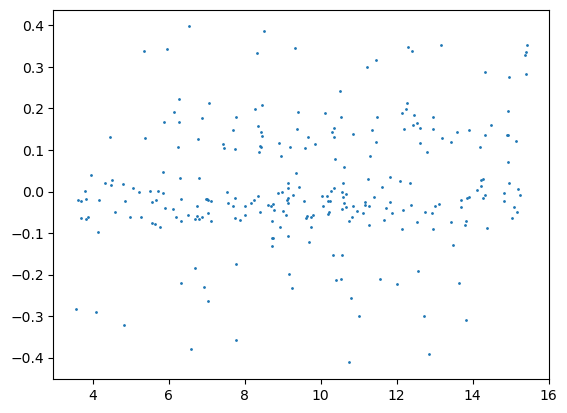

In [46]:

plt.plot(df['z_fitted'], df['dz'], 'o', markersize=1)

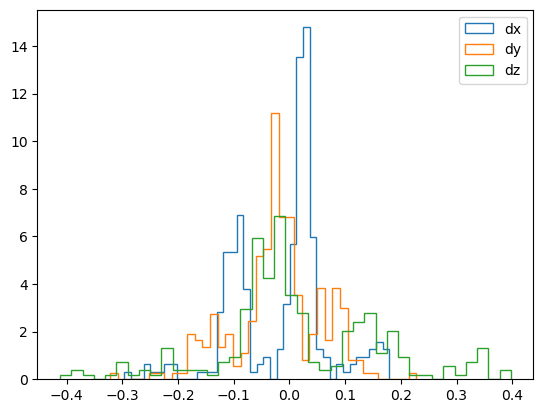

In [49]:
b = 40
plt.hist(df['dx'], bins=b,histtype='step',label='dx',density=True)
plt.hist(df['dy'], bins=b,histtype='step',label='dy',density=True)
plt.hist(df['dz'], bins=b,histtype='step',label='dz',density=True)
plt.legend()
plt.show()

In [50]:
pixel_xy = 0.13 
pixel_z = 0.2

df_filtered = df[(df['dx'] < pixel_xy) & (df['dy'] <pixel_xy) & (df['dz'] < pixel_z)]

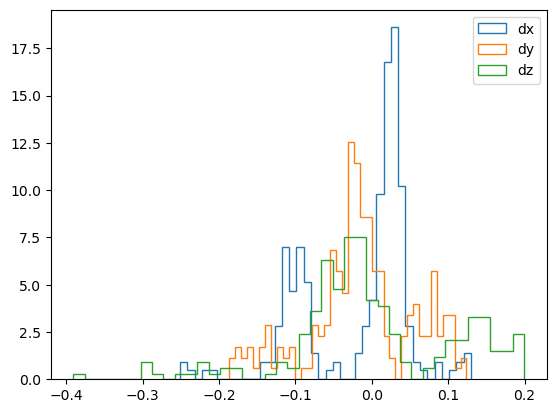

In [51]:
b = 40
plt.hist(df_filtered['dx'], bins=b,histtype='step',label='dx',density=True)
plt.hist(df_filtered['dy'], bins=b,histtype='step',label='dy',density=True)
plt.hist(df_filtered['dz'], bins=b,histtype='step',label='dz',density=True)
plt.legend()
plt.show()

In [52]:
print(f"dx: {df_filtered['dx'].mean()}, dy: {df_filtered['dy'].mean()}, dz: {df_filtered['dz'].mean()}")

dx: -0.015757761660647063, dy: -0.014118047080839356, dz: -0.0001341527592239211


In [76]:
d = np.mean(np.sqrt(df_filtered['dx']**2 + df_filtered['dy']**2+df_filtered['dz']**2))
d

0.1250361468614865

In [61]:
reference = df_filtered[['x','y','z']].values.T
moving = df_filtered[['x','y','z']].values.T + df_filtered[['dx','dy','dz']].values.T

In [63]:
R, t = cor.calculate_rototranslation_3D(reference.T,moving.T)

In [64]:
moving_cor = np.dot(R,moving)+t

In [65]:
dx,dy,dz = reference - moving_cor

In [68]:
print(np.std(dz),np.std(df_filtered['dz']))

0.10498983395463998 0.10610826265136729


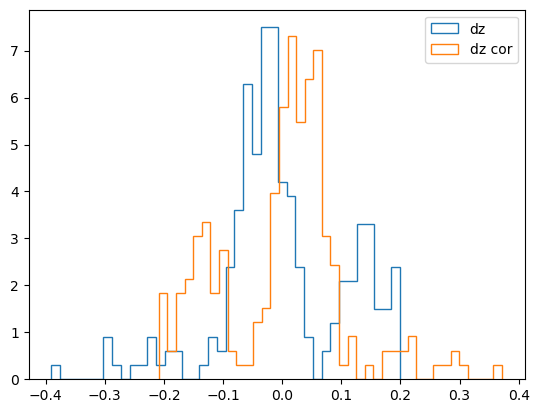

In [72]:
b = 40
# plt.hist(df_filtered['dx'], bins=b,histtype='step',label='dx',density=True)
# plt.hist(dx, bins=b,histtype='step',label='dx cor',density=True)
# plt.hist(df_filtered['dy'], bins=b,histtype='step',label='dy',density=True)
# plt.hist(dy, bins=b,histtype='step',label='dy cor',density=True)
plt.hist(df_filtered['dz'], bins=b,histtype='step',label='dz',density=True)
plt.hist(dz, bins=b,histtype='step',label='dz cor',density=True)
plt.legend()
plt.show()

In [73]:
d_cor = np.mean(np.sqrt(dx**2 + dy**2+dz**2))
d_cor

0.12401208272789298

In [77]:
print(d,d_cor)

0.1250361468614865 0.12401208272789298
